Nama kolom: Index(['review', 'label', 'cleaned_review'], dtype='object')
                                              review  label  \
0            Not bad sih, tapi banyak lecet di body.      0   
1      Udah komplain tapi malah disuruh sabar terus.      0   
2      Overall puas, cuma agak kecewa sama kurirnya.      1   
3       Pakai sebentar langsung mati, sayang banget.      0   
4  Sudah dicoba, berfungsi baik walau instruksi k...      1   

                                      cleaned_review  
0              not bad sih tapi banyak lecet di body  
1       udah komplain tapi malah disuruh sabar terus  
2        overall puas cuma agak kecewa sama kurirnya  
3         pakai sebentar langsung mati sayang banget  
4  sudah dicoba berfungsi baik walau instruksi ku...  

--- Naive Bayes ---
Akurasi: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.93      1.00   

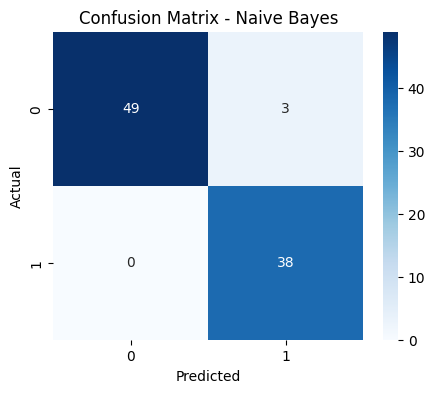

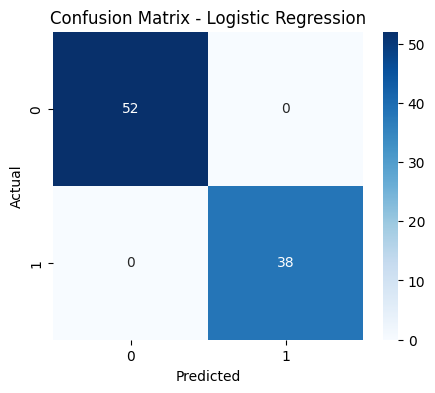

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Dataset
df = pd.read_csv(r"C:/Users/HP CAMO/Downloads/review_penjualan_online_realistis_biner.csv")  # Sesuaikan path
df = df.dropna()

# 3. Preprocessing Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Hapus karakter non-huruf
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

# 3. Tampilkan nama kolom dan data awal
print("Nama kolom:", df.columns)
print(df.head())

# 4. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['label']  # Asumsinya kolom label ada

# 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Train Naive Bayes
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)
nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
logits = lr_model.decision_function(X_test)


# 8. Evaluasi Naive Bayes
print("\n--- Naive Bayes ---")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


# 10. Visualisasi Confusion Matrix
def plot_confusion(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion(confusion_matrix(y_test, y_pred_nb), "Naive Bayes")
plot_confusion(confusion_matrix(y_test, y_pred_lr), "Logistic Regression")


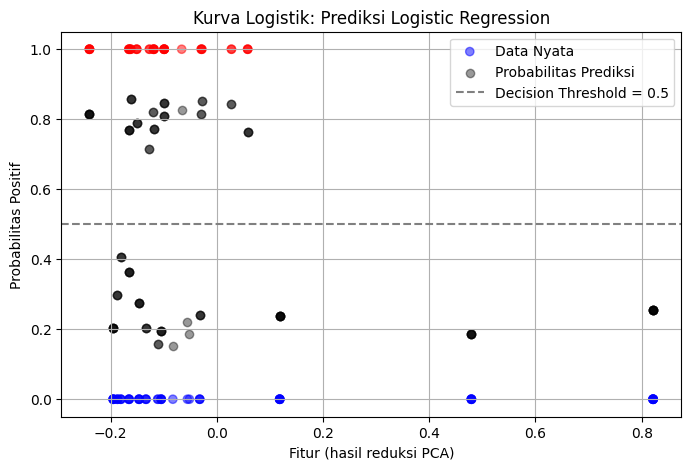

In [2]:
from sklearn.decomposition import PCA
from scipy.special import expit  # Sigmoid function

# 11. Reduksi dimensi ke 1 fitur menggunakan PCA untuk visualisasi
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X_test.toarray())  # dari sparse matrix ke array

# 12. Hitung probabilitas prediksi
logits = lr_model.decision_function(X_test)  # nilai linear sebelum sigmoid
probs = expit(logits)  # sigmoid

# 13. Plot Kurva Logistik
plt.figure(figsize=(8, 5))
plt.scatter(X_reduced, y_test, c=y_test, cmap='bwr', alpha=0.5, label='Data Nyata')
plt.scatter(X_reduced, probs, c='black', alpha=0.4, label='Probabilitas Prediksi')
plt.title('Kurva Logistik: Prediksi Logistic Regression')
plt.xlabel('Fitur (hasil reduksi PCA)')
plt.ylabel('Probabilitas Positif')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()


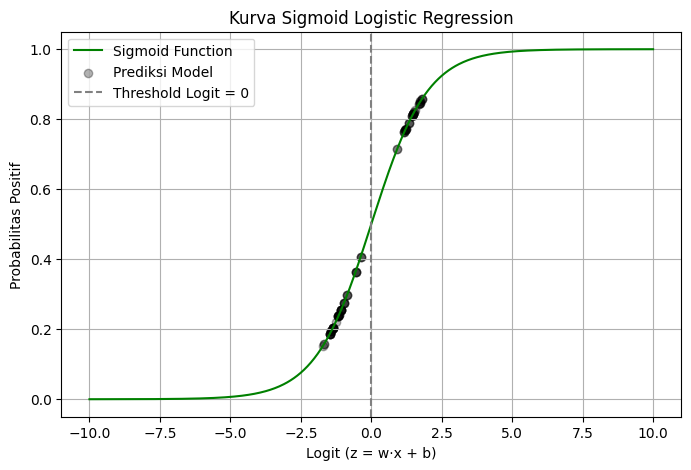

In [3]:
# 14. Plot garis kurva sigmoid
z = np.linspace(-10, 10, 500)  # nilai logit z
sigmoid = expit(z)

plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid, label='Sigmoid Function', color='green')  # Kurva sigmoid
plt.scatter(logits, probs, alpha=0.3, color='black', label='Prediksi Model')  # Titik prediksi model
plt.title('Kurva Sigmoid Logistic Regression')
plt.xlabel('Logit (z = w·x + b)')
plt.ylabel('Probabilitas Positif')
plt.axvline(0, color='gray', linestyle='--', label='Threshold Logit = 0')
plt.grid(True)
plt.legend()
plt.show()
